## Project: Predicting Boston Housing Prices
### Data  

The modified Boston housing dataset consists of 489 data points, with each datapoint having 3 features. This dataset is a modified version of the Boston Housing dataset found on the <a href="https://archive.ics.uci.edu/ml/index.php">UCI Machine Learning Repository</a> and you can find the main dataset on the 
<a href="https://www.kaggle.com/c/boston-housing">Kaggle</a>


### Features  

RM: average number of rooms per dwelling (Total number of rooms in home)  
LSTAT: percentage of population considered lower status (Neighborhood poverty level )  
PTRATIO: pupil-teacher ratio by town  (Student-teacher ratio of nearby schools)  
Target Variable: MEDV: median value of owner-occupied homes (house price)  

In [30]:
# Import libraries:
import pandas as pd
%matplotlib inline

In [2]:
# Load the Boston housing dataset
df = pd.read_csv("housing.csv")

In [3]:
# Data Exploration
df.head()

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


In [4]:
df.shape

(489, 4)

In [5]:
df.describe()

,RM,LSTAT,PTRATIO,MEDV
count,489.000000,489.000000,489.000000,4.890000e+02
mean,6.240288,12.939632,18.516564,4.543429e+05
std,0.643650,7.081990,2.111268,1.653403e+05
min,3.561000,1.980000,12.600000,1.050000e+05
25%,5.880000,7.370000,17.400000,3.507000e+05
50%,6.185000,11.690000,19.100000,4.389000e+05
75%,6.575000,17.120000,20.200000,5.187000e+05
max,8.398000,37.970000,22.000000,1.024800e+06


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489 entries, 0 to 488
Data columns (total 4 columns):
RM         489 non-null float64
LSTAT      489 non-null float64
PTRATIO    489 non-null float64
MEDV       489 non-null float64
dtypes: float64(4)
memory usage: 15.4 KB


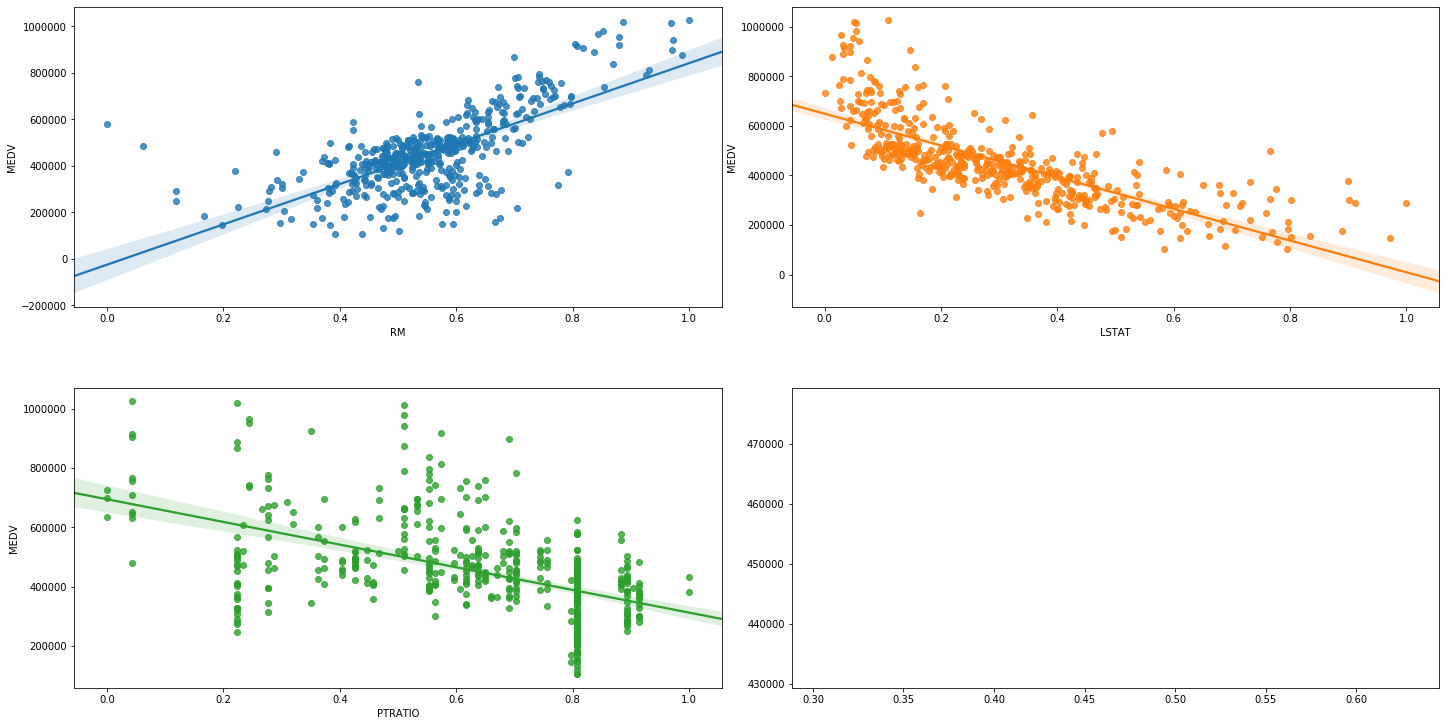

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
# Let's scale the columns before plotting them against MEDV
min_max_scaler = preprocessing.MinMaxScaler()
column_sels = ['RM', 'LSTAT', 'PTRATIO']
x = df.loc[:,column_sels]
y = df['MEDV']
x = pd.DataFrame(data=min_max_scaler.fit_transform(x), columns=column_sels)
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for i, k in enumerate(column_sels):
    sns.regplot(y=y, x=x[k], ax=axs[i])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [7]:
#define variables(features,prices)
prices = df['MEDV']
features = df.drop('MEDV', axis = 1)

In [9]:
features.head()

,RM,LSTAT,PTRATIO
0,6.575,4.98,15.3
1,6.421,9.14,17.8
2,7.185,4.03,17.8
3,6.998,2.94,18.7
4,7.147,5.33,18.7


In [11]:
prices.head()

0    504000.0
1    453600.0
2    728700.0
3    701400.0
4    760200.0
Name: MEDV, dtype: float64

In [13]:
#split the data to two sets. training set and testing set:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, 
                                                    prices, 
                                                    test_size = 0.25, 
                                                    random_state = 0)

In [14]:
#print
print("training set:",X_train.shape,y_train.shape[0])
print("testing set:",X_test.shape,y_test.shape[0])


training set: (366, 3) 366
testing set: (123, 3) 123


In [16]:
#create the rgression model:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [17]:
#fit/train the model:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
#predict X_test by the model:
predictions = model.predict(X_test)

In [22]:
#model accuracy:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

r2 = r2_score(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)

In [24]:
print("R2 Score:",r2)
print("Mean Squared Error:",mse)
print("Mean Absuolute Error:",mae)

R2 Score: 0.687026296346364
Mean Squared Error: 9873488488.137506
Mean Absuolute Error: 74907.15842493459
